#  Categorical Variables

---

Categorical variables are a fundamental concept in data science and machine learning as they represent distinct categories or labels, such as "Country," "Season," or "Diagnosis." Unlike numerical variables, categorical data lacks a natural order or ranking. To use these variables in machine learning models, they must first be transformed into a numerical format. However, this transformation needs to be performed thoughtfully to avoid introducing unintended relationships or hierarchies.

## The Problem with Simple Integer Encoding

A naive solution might involve assigning integers to each category:

For example, in a dataset containing categorical information like "Gender," "Blood Type," or "Treatment Type," it might seem reasonable to assign integer values. In the case of blood types {A, B, AB, O}, you might assign {A=0, B=1, AB=2, O=3}. 

However, this simple integer encoding creates an unintended ordinal relationship between the categories, implying that blood type O is "greater than" blood type A, when no such relationship exists. This can mislead machine learning models, particularly those that rely on distance or linearity, into making inaccurate assumptions about the data.

In [23]:
import pandas as pd

# Example dataset with categorical data
data = {'Patient': ['A', 'B', 'C', 'D'], 
        'Blood_Type': ['A', 'B', 'AB', 'O']}
df_blood = pd.DataFrame(data)

# Simple integer encoding (problematic)
df_blood['Blood_Type_Encoded'] = df_blood['Blood_Type'].astype('category').cat.codes
display(df_blood)


,Patient,Blood_Type,Blood_Type_Encoded
0,A,A,0
1,B,B,2
2,C,AB,1
3,D,O,3


### One-Hot Encoding

One-hot encoding solves the problem of artificial ordering by creating binary (0/1) columns for each category. Each column represents a category, and a value of 1 indicates the presence of that category, while a 0 means absence. 
For example, for blood types {A, B, AB, O}, one-hot encoding would create four new binary columns. 


In [24]:
# One-Hot Encoding Example
df_onehot = pd.get_dummies(df_blood['Blood_Type'], prefix='Blood_Type')
display(df_onehot)


,Blood_Type_A,Blood_Type_AB,Blood_Type_B,Blood_Type_O
0,True,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,False,True


A one-hot encoding would create separate columns for each category, ensuring that no ordinal relationship is implied.

One-hot encoding is very simple to understand, but it uses one more bit than is strictly necessary. 
If we see that k–1 of the bits are 0, then the last bit must be 1 because the variable must take on one of the k values. 
Mathematically, one can write this constraint as “the sum of all bits must be equal to 1”:

$$
e_1 + e_2 + \dots + e_k = 1
$$

Suppose we are trying to predict the average cost of treatment based on the hospital where the patient receives care. 
Let's consider that we have data from three hospitals: "General Hospital," "City Clinic," and "Specialized Care Center."

We can train a linear regressor to predict cost of treatment based solely on the identity of the hospital:

$$
y = w_1x_1 + \dots + w_nx_n + b
$$

(It is customary to fit an extra constant term called the intercept, so that `y` can be a nonzero value when the `x`’s are zeros.)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [26]:
# Create a sample dataframe with treatment cost data from three hospitals
df = pd.DataFrame({
    'Hospital': ['General', 'General', 'General', 'City Clinic', 'City Clinic', 'City Clinic', 'Specialized', 'Specialized', 'Specialized'],
    'Treatment_Cost': [5000, 5200, 5100, 4800, 4900, 4950, 6000, 6050, 6100]
})

df

,Hospital,Treatment_Cost
0,General,5000
1,General,5200
2,General,5100
3,City Clinic,4800
4,City Clinic,4900
5,City Clinic,4950
6,Specialized,6000
7,Specialized,6050
8,Specialized,6100


In [27]:
# One-hot encode the 'Hospital' column
one_hot_df = pd.get_dummies(df, prefix=['Hospital'])

one_hot_df

,Treatment_Cost,Hospital_City Clinic,Hospital_General,Hospital_Specialized
0,5000,False,True,False
1,5200,False,True,False
2,5100,False,True,False
3,4800,True,False,False
4,4900,True,False,False
5,4950,True,False,False
6,6000,False,False,True
7,6050,False,False,True
8,6100,False,False,True


In [28]:
# Define the predictor variables and target variable
X = one_hot_df[['Hospital_City Clinic', 'Hospital_General', 'Hospital_Specialized']]
y = one_hot_df['Treatment_Cost']

In [29]:
# Create and fit a linear regression model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

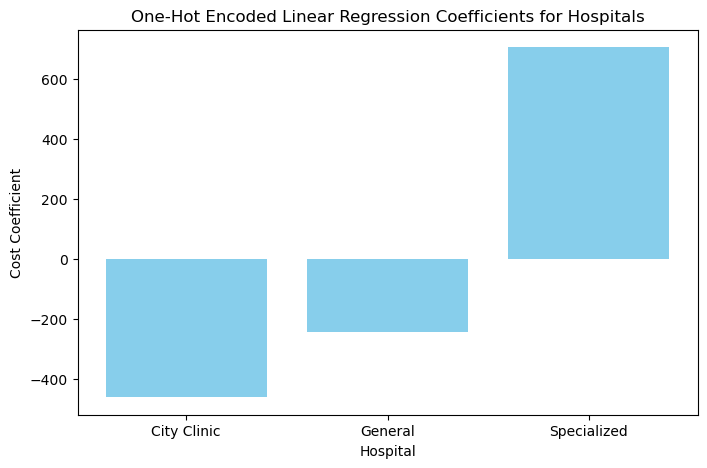

In [30]:
# Plotting the result
hospitals = ['City Clinic', 'General', 'Specialized']
coefficients = lin_reg.coef_

# Create a bar plot for the coefficients
plt.figure(figsize=(8, 5))
plt.bar(hospitals, coefficients, color='skyblue')
plt.xlabel('Hospital')
plt.ylabel('Cost Coefficient')
plt.title('One-Hot Encoded Linear Regression Coefficients for Hospitals')
plt.show()

In [31]:
# Get the model coefficients and intercept
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

Coefficients: [-461.11111111 -244.44444444  705.55555556]
Intercept: 5344.444444444444


With one-hot encoding, the intercept term represents the global mean of the target variable, Rent, and each of the linear coefficients represents how much that city’s average rent differs from the global mean.

In [32]:
df['Treatment_Cost'].mean()

5344.444444444444

### Dummy Coding

The problem with one-hot encoding is that it allows for k degrees of freedom, while the variable itself needs only k–1. 

Dummy encoding is similar to one-hot encoding, but it drops one of the categories to avoid collinearity. This is particularly useful when using linear models, where collinearity can lead to issues during training. The dropped category is represented by the vector of all zeros and acts as the "baseline" against which other categories are compared. This is known as the *reference category*. 

Dummy encoding could be used to represent the type of treatment a patient receives (e.g., "No Treatment" is the baseline, and "Treatment A" and "Treatment B" are dummy-encoded).

In [33]:
# Dummy Encoding Example
df_dummy = pd.get_dummies(df_blood['Blood_Type'], drop_first=True, prefix='Blood_Type')
display(df_dummy)


,Blood_Type_AB,Blood_Type_B,Blood_Type_O
0,False,False,False
1,False,True,False
2,True,False,False
3,False,False,True


The outcome of modeling with dummy coding is more interpretable than with one-hot encoding.

In [34]:
dummy_df = pd.get_dummies(df, prefix=['Hospital'], drop_first=True)
dummy_df

,Treatment_Cost,Hospital_General,Hospital_Specialized
0,5000,True,False
1,5200,True,False
2,5100,True,False
3,4800,False,False
4,4900,False,False
5,4950,False,False
6,6000,False,True
7,6050,False,True
8,6100,False,True


In [35]:
X = dummy_df[['Hospital_General', 'Hospital_Specialized']]
y = dummy_df['Treatment_Cost']

lin_reg.fit(X,y)

LinearRegression()

With dummy coding, the bias coefficient represents the mean value of the response variable `y` for the reference category, which in the example is the Hospital *City Clinic*. 
The coefficient for the ith feature is equal to the difference between the mean response value for the ith category and the mean of the reference category.

In [39]:
# Get the model coefficients and intercept
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

Coefficients: [ 216.66666667 1166.66666667]
Intercept: 4883.333333333333


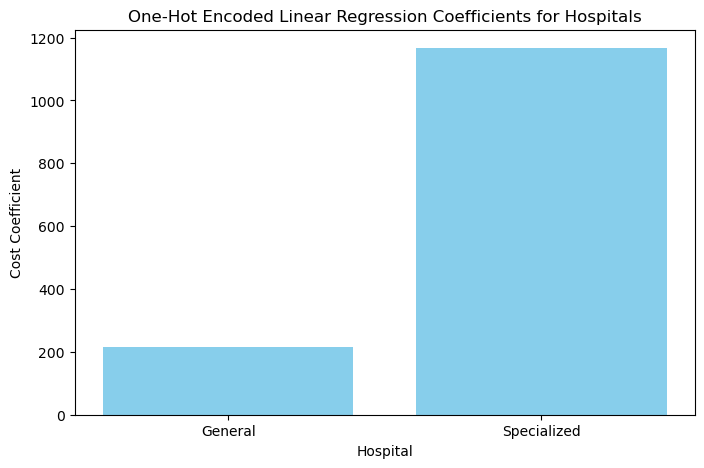

In [40]:
# Plotting the result
hospitals = [ 'General', 'Specialized']
coefficients = lin_reg.coef_

# Create a bar plot for the coefficients
plt.figure(figsize=(8, 5))
plt.bar(hospitals, coefficients, color='skyblue')
plt.xlabel('Hospital')
plt.ylabel('Cost Coefficient')
plt.title('One-Hot Encoded Linear Regression Coefficients for Hospitals')
plt.show()

## Effect Coding

Effect coding, or contrast coding, is very similar to dummy coding, with the difference that the reference category is now represented by the vector of all –1’s.
Thus, by regressing the effect-coded variables, we compare each level of a categorical variable to the overall (unweighted) mean rather than to a reference category. 

This encoding is particularly useful for analyzing the effect of categorical variables in linear models. 

Effect coding can be used in experiments where the goal is to measure the effect of various treatments compared to the average effect across all treatments.

In [50]:
effect_df = dummy_df.copy()

In [52]:
effect_df.loc[3:5, ['Hospital_General', 'Hospital_Specialized']] = -1.0
effect_df

,Treatment_Cost,Hospital_General,Hospital_Specialized
0,5000,True,False
1,5200,True,False
2,5100,True,False
3,4800,-1.0,-1.0
4,4900,-1.0,-1.0
5,4950,-1.0,-1.0
6,6000,False,True
7,6050,False,True
8,6100,False,True


With effect coding, results in linear regression models are even simpler to interpret.

The intercept term represents the global mean of the target variable, and the individual coefficients indicate how much the means of the individual categories differ from the global mean.

In [55]:
X = effect_df[['Hospital_General', 'Hospital_Specialized']]
y = effect_df['Treatment_Cost']

lin_reg.fit(X,y)

# Get the model coefficients and intercept
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

Coefficients: [-244.44444444  705.55555556]
Intercept: 5344.444444444444


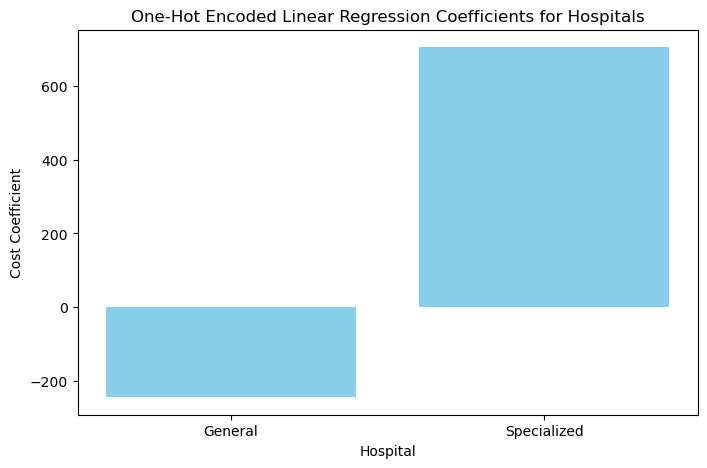

In [56]:
# Plotting the result
hospitals = ['General', 'Specialized']
coefficients = lin_reg.coef_

# Create a bar plot for the coefficients
plt.figure(figsize=(8, 5))
plt.bar(hospitals, coefficients, color='skyblue')
plt.xlabel('Hospital')
plt.ylabel('Cost Coefficient')
plt.title('One-Hot Encoded Linear Regression Coefficients for Hospitals')
plt.show()

### Pros and Cons of Categorical Variable Encodings

One-hot, dummy, and effect coding are all methods for encoding categorical variables, each with its own advantages and drawbacks. 

One-hot encoding introduces redundancy, as it creates extra features that can lead to multiple valid models for the same problem. This redundancy can complicate interpretation, but the benefit is that each category has a clear, separate representation. One-hot encoding also handles missing data well, as the all-zeros vector can represent a missing category, resulting in predictions close to the overall mean of the target variable.

Dummy coding, unlike one-hot encoding, is not redundant and produces unique, interpretable models. However, it struggles with missing data because the all-zeros vector is reserved for the reference category. Additionally, it encodes the impact of each category relative to a chosen reference, which may seem counterintuitive in some cases.

Effect coding addresses the issue of relative encoding by assigning a different code to the reference category. However, it introduces a dense vector of all –1’s, which increases computational and storage costs. As a result, popular machine learning libraries like Pandas and scikit-learn favor dummy and one-hot encoding over effect coding for practical reasons.

All three methods face challenges when dealing with categorical variables with a large number of categories, requiring alternative strategies for such cases.


| **Method**          | **Redundancy**        | **Handling Missing Data**                     | **Interpretability**                         | **Relative Encoding**                  | **Practical Use**                      |
|---------------------|-----------------------|-----------------------------------------------|---------------------------------------------|----------------------------------------|-----------------------------------------|
| **One-hot encoding** | Redundant (creates extra features) | Good (all-zeros vector can represent missing data) | Clear, separate representation for each category | No relative encoding                   | Widely used (e.g., scikit-learn, Pandas) |
| **Dummy coding**     | Not redundant         | Struggles (all-zeros reserved for reference category) | Unique, interpretable models                | Encodes relative to a reference category | Popular but struggles with missing data |
| **Effect coding**    | Not redundant, dense vectors (-1’s) | Not specifically suited for missing data      | Somewhat interpretable                     | No, assigns distinct code for reference | Less used due to higher computation/storage cost |


## Dealing with Large Categorical Variables

When dealing with categorical variables that have a large number of unique categories (e.g., thousands of different genetic markers), the encoding strategies mentioned earlier can become computationally expensive.
This results in:
- Increased memory consumption.
- Slower computations.
- Potential overfitting due to sparsity.

The challenge is to find a good feature representation that is memory efficient, yet produces accurate models that are fast to train. 

Generally, existing solutions can be reduecd to:

- Do nothing fancy with the encoding. Use a **simple model** that is cheap to train. Feed one-hot encoding into a linear model (logistic regression or linear support vector machine) on lots of machines.
- Compress the features. There are two choices:
    - **Feature hashing**, popular with linear models
    - **Bin counting**, popular with linear models as well as trees

### Feature Hashing

Feature hashing, also known as the hashing trick, is a technique where each category is hashed into a fixed number of bins. This approach allows for a more compact representation of large categorical variables, but it introduces a risk of collisions where different categories are hashed into the same bin.

Consider a dataset of DNA sequences where each patient has a unique sequence identifier. Feature hashing can reduce the complexity of encoding these identifiers while still providing useful model input.

Feature hashing solves maps the original categorical variables into a lower-dimensional space using a **hash function**.

Let’s denote:
- $ x \in \mathcal{X} $ as the categorical input.
- $ \phi(x) \in \mathbb{R}^d $ as the hashed output feature vector of fixed dimensionality $( d )$.
- $ h: \mathcal{X} \rightarrow \{1, 2, \dots, d\} $ as the hash function mapping categories to the output dimension.

For each categorical feature $x$, feature hashing applies:

$$
\phi_i(x) = \sum_{h(x)=i} \text{sign}(h(x))
$$

Where:
- $ h(x) $ is the hash function that maps the input category $ x $ to one of the $ d $ buckets (output features).
- $ \text{sign}(h(x)) $ assigns either $ +1 $ or $ -1 $ to the hashed feature to maintain parity between positive and negative feature contributions, preventing bias due to collisions (where multiple categories map to the same bucket).

Consider a genomic dataset with thousands of different **genetic markers**. Traditional encoding methods like one-hot encoding would create thousands of binary features for each marker, which is inefficient and computationally expensive. Feature hashing allows us to reduce these markers into a fixed-size feature vector.



In [60]:
from sklearn.feature_extraction import FeatureHasher

# Example dataset with large categorical variable
df_large = pd.DataFrame({'Genetic_Marker': ['MarkerA', 'MarkerB', 'MarkerC', 'MarkerD', 'MarkerE']})

# Convert the Genetic_Marker column to a list of dictionaries
marker_dict = df_large['Genetic_Marker'].apply(lambda x: {x: 1}).tolist()

# Feature Hashing with 3 output features
hasher = FeatureHasher(n_features=3, input_type='dict')
hashed_features = hasher.transform(marker_dict)

# Convert the hashed features into a DataFrame
hashed_df = pd.DataFrame(hashed_features.toarray(), columns=[f'Feature_{i+1}' for i in range(3)])
display(hashed_df)


,Feature_1,Feature_2,Feature_3
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,-1.0,0.0,0.0
3,0.0,0.0,-1.0
4,-1.0,0.0,0.0


### Collisions
One potential downside of feature hashing is the possibility of **hash collisions**, where two or more categories map to the same bucket. While this causes some loss of information, the sign function $ \text{sign}(h'(x)) $ mitigates the negative effects by ensuring that categories are summed with varying signs, reducing the bias introduced by collisions.

In practice, the dimension $ d $ is chosen to be large enough so that collisions do not significantly degrade the model’s performance. 

### Bin Counting

The concept of bin counting is straightforward yet powerful: instead of using the value of a categorical variable directly as a feature, we calculate the conditional probability of the target variable given that categorical value. This approach converts a large, sparse, binary representation—such as that generated by one-hot encoding—into a compact, dense, real-valued numeric representation. Specifically, bin counting captures the association statistics between the categorical value and the target, assuming all features are independent.

In practice, bin counting can be particularly useful in medical datasets, where the frequency of certain procedures or diagnoses is significant. For example, when encoding the occurrence of various medical conditions in a hospital's records, bin counting allows rare diagnoses to be weighted more heavily, reflecting their unique medical significance. This method not only reduces dimensionality but also enhances the model’s ability to handle rare events, such as uncommon diseases, effectively.

In [62]:
# Example: Bin Counting for Categorical Variable
df_blood['Blood_Type_Count'] = df_blood['Blood_Type'].map(df_blood['Blood_Type'].value_counts())
display(df_blood)


,Patient,Blood_Type,Blood_Type_Encoded,Blood_Type_Count
0,A,A,0,1
1,B,B,2,1
2,C,AB,1,1
3,D,O,3,1


Careful selection and preprocessing of categorical variables enhance the performance of machine learning models. However, no method is flawless and choosing the appropriate encoding method for categorical variables depends on the specific problem and characteristics of the data. 

Linear models, which are less computationally intensive, can efficiently handle non-compressed representations like one-hot encoding, while tree-based models require smaller representations, such as bin counting, due to their need for repeated feature searches during splits. Feature hashing occupies a middle ground, though its impact on accuracy varies.